# Setup

In [1]:
%matplotlib notebook
LOG_PLOT = False
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
import os
from helper import *
df = ecdc()

def country_name(geoId):
    return df[df.geoId==geoId].iloc[0].countriesAndTerritories.replace('_', ' ')

print(df.columns)

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')


## ECDC Data

In [2]:


def plot_selection(selection, roll_days=7, log=False):   
    f,ax = plt.subplots()
    ax.plot(selection.dateRep, selection['cases'].rolling(roll_days).mean(), label=f'{roll_days} day average', marker='o', markersize=4, linestyle='--')
#     ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))

    plt.xticks(rotation=45)
    ax.bar(selection.dateRep, selection['cases'],label='recorded',  alpha=0.6, color='C1')
    plt.legend(loc='best')
    if log:
        plt.yscale('log')
        
    plt.title(selection.iloc[0].countriesAndTerritories.replace('_', ' '))
    plt.tight_layout()

    return f

def plot_comparison(geoIds, roll_days=7, log=False, ndays=30):
    f,ax = plt.subplots(figsize=(9,6))
    for geoId in geoIds:
        selection = select_country(geoId, ndays)
        ax.plot(selection.dateRep, selection['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], 
                label=country_name(geoId))

    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))

    plt.xticks(rotation=45)
    if log:
        plt.yscale('log')
        
    plt.legend(loc='best')
    plt.title('Cumulative number for 14 days of COVID-19 cases per 100000')
    plt.tight_layout()

def select_country(geoId, ndays=0):
    if not ndays:
        selection = df[df.geoId==geoId].sort_values(by=['year','month','day'], ascending=True)
    else:
        selection = df[df.geoId==geoId].sort_values(by=['year','month','day'], ascending=True).tail(ndays)
        
    return selection

def plot_country(geoId, **kwargs):
    return plot_selection(select_country(geoId), **kwargs)
    


## Austria - from Gesundheitsminesterium

In [3]:

def plot_Austria(roll_days=7, log=False):
    df = at()
    f,ax = plt.subplots()
    ax.plot(df.time, df['tägliche Erkrankungen'].rolling(roll_days).mean(), label=f'{roll_days} day average', marker='o', markersize=4, linestyle='--')
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    plt.xticks(rotation=45)
    ax.bar(df.time, df['tägliche Erkrankungen'],label='recorded',  alpha=0.6, color='C1')
    plt.legend(loc='best')
    plt.title('Positive COVID tests')
    if log:
        plt.yscale('log')
    plt.tight_layout()
    return f


## DF Subsets

In [4]:
SELECTION =  df[df.geoId.isin(['AT', 'IN', 'US', 'UK', 'DE', 'IT', 'NL'])]
EU = df[df.continentExp=='Europe']
AMERICA = df[(df.continentExp=='America')]


# Comparison per 100,000 of the population

<IPython.core.display.Javascript object>


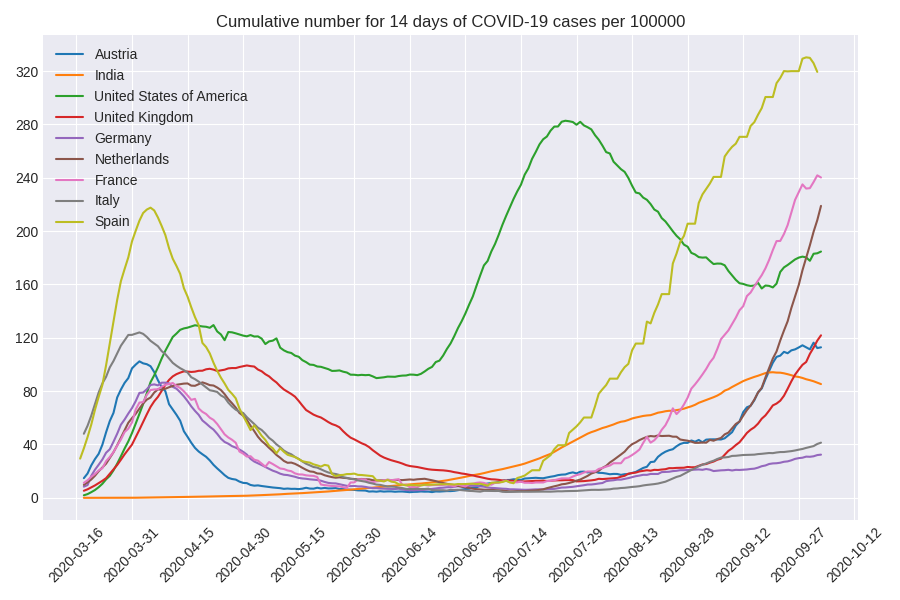

In [5]:
countries = ['AT', 'IN', 'US', 'UK', 'DE', 'NL', 'FR',  'IT', 'ES']
plot_comparison(countries, log=False, ndays=200)

# Overview

## Selected Countries

In [6]:
overview(SELECTION)

cases                                     deaths  \
                              sum last_7_days_sum rolling_avg latest     sum   
countriesAndTerritories                                                        
India                     6473544          569612       81373  79476  100842   
United_States_of_America  7332285          298855       42694  54471  208716   
United_Kingdom             467146           43910        6273   6968   42268   
Netherlands                127786           21976        3139   3820    6419   
Germany                    296958           14228        2033   2563    9527   
Italy                      319908           13673        1953   2499   35941   
Austria                     47189            4872         696    872     803   

                                                             
                         last_7_days_sum rolling_avg latest  
countriesAndTerritories                                      
India                               7463        1066   1069  
United_States_of_America            4942         706    908  
United_Kingdom                       332          47     66  
Netherlands                          100          14      9  
Germany                               75          11     19  
Italy                                140          20     23  
Austria                               17           2      1

## Most cases in the last 7 days

### Europe

In [7]:
overview(EU).head(5)

cases                                    deaths  \
                             sum last_7_days_sum rolling_avg latest    sum   
countriesAndTerritories                                                      
France                    589653           76619       10946  12148  32155   
Spain                     789932           73451       10493  11325  32086   
Russia                   1194643           58595        8371   9412  21077   
United_Kingdom            467146           43910        6273   6968  42268   
Ukraine                   217661           25990        3713   8702   4261   

                                                            
                        last_7_days_sum rolling_avg latest  
countriesAndTerritories                                     
France                              494          71    136  
Spain                               854         122    113  
Russia                             1021         146    186  
United_Kingdom                      332          47     66  
Ukraine                             434          62     68

### America

In [8]:
overview(AMERICA).head(5)

cases                                     deaths  \
                              sum last_7_days_sum rolling_avg latest     sum   
countriesAndTerritories                                                        
United_States_of_America  7332285          298855       42694  54471  208716   
Brazil                    4880523          190910       27273  33431  145388   
Argentina                  779676           88454       12636  14687   20599   
Colombia                   841531           43214        6173   6192   26397   
Mexico                     753090           32232        4605   4775   78492   

                                                             
                         last_7_days_sum rolling_avg latest  
countriesAndTerritories                                      
United_States_of_America            4942         706    908  
Brazil                              4851         693    708  
Argentina                           5391         770    311  
Colombia                            1294         185    201  
Mexico                              2648         378    414

### World

In [9]:
overview(df).head(5)

cases                                     deaths  \
                              sum last_7_days_sum rolling_avg latest     sum   
countriesAndTerritories                                                        
India                     6473544          569612       81373  79476  100842   
United_States_of_America  7332285          298855       42694  54471  208716   
Brazil                    4880523          190910       27273  33431  145388   
Argentina                  779676           88454       12636  14687   20599   
France                     589653           76619       10946  12148   32155   

                                                             
                         last_7_days_sum rolling_avg latest  
countriesAndTerritories                                      
India                               7463        1066   1069  
United_States_of_America            4942         706    908  
Brazil                              4851         693    708  
Argentina                           5391         770    311  
France                               494          71    136

## Lowset number of new cases in the last 7 days

### Europe*

\*among countries with population of at least 1 million

In [10]:
overview(EU[EU.popData2019>1*10**6]).tail(10)

cases                                    deaths  \
                           sum last_7_days_sum rolling_avg latest    sum   
countriesAndTerritories                                                    
North_Macedonia          18363            1020         146    225    749   
Albania                  13965             920         131    159    389   
Lithuania                 4956             772         110    172     93   
Norway                   14149             743         106    122    275   
Finland                  10204             720         103    101    345   
Azerbaijan               40453             666          95    144    594   
Serbia                   33735             497          71     73    751   
Estonia                   3507             389          56     57     66   
Kosovo                   15703             324          46     40    627   
Latvia                    1945             320          46     77     38   

                                                            
                        last_7_days_sum rolling_avg latest  
countriesAndTerritories                                     
North_Macedonia                      28           4      6  
Albania                              16           2      1  
Lithuania                             4           1      1  
Norway                                5           1      1  
Finland                               2           0      1  
Azerbaijan                           11           2      1  
Serbia                                5           1      1  
Estonia                               2           0      1  
Kosovo                               10           1      0  
Latvia                                2           0      1

### America*

\*among countries with population of at least 10 million

In [11]:
overview(AMERICA[AMERICA.popData2019>1*10**7]).tail(5)


cases                                    deaths  \
                            sum last_7_days_sum rolling_avg latest    sum   
countriesAndTerritories                                                     
Guatemala                 93090            4212         602    681   3267   
Bolivia                  136219            2997         428    503   8045   
Dominican_Republic       113350            2753         393    622   2117   
Cuba                       5718             368          53     48    122   
Haiti                      8792             108          15     26    229   

                                                            
                        last_7_days_sum rolling_avg latest  
countriesAndTerritories                                     
Guatemala                            81          12      6  
Bolivia                             245          35     44  
Dominican_Republic                   30           4      9  
Cuba                                  4           1      0  
Haiti                                 2           0      0

### World*
\*among countries with population of at least 10 million

In [12]:
overview( df[df.popData2019>1*10**7]).tail(5)


cases                                    deaths  \
                              sum last_7_days_sum rolling_avg latest    sum   
countriesAndTerritories                                                       
Yemen                        2043              10           1      5    588   
Taiwan                        517               7           1      0      7   
Niger                        1198               4           1      1     69   
Cambodia                      278               3           0      1      0   
United_Republic_of_Tanzania   509               0           0      0     21   

                                                                
                            last_7_days_sum rolling_avg latest  
countriesAndTerritories                                         
Yemen                                     1           0      0  
Taiwan                                    0           0      0  
Niger                                     0           0      0  
Cambodia                                  0           0      0  
United_Republic_of_Tanzania               0           0      0

# Austria
Compare ECDC data with Gesundheitsminesterium Data

## Plots

<IPython.core.display.Javascript object>


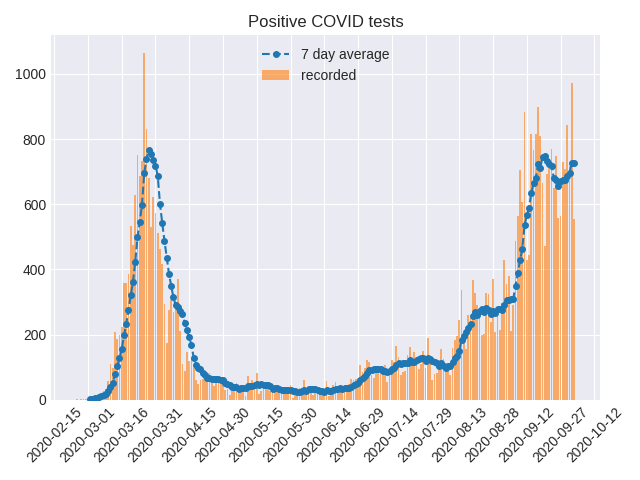

<IPython.core.display.Javascript object>


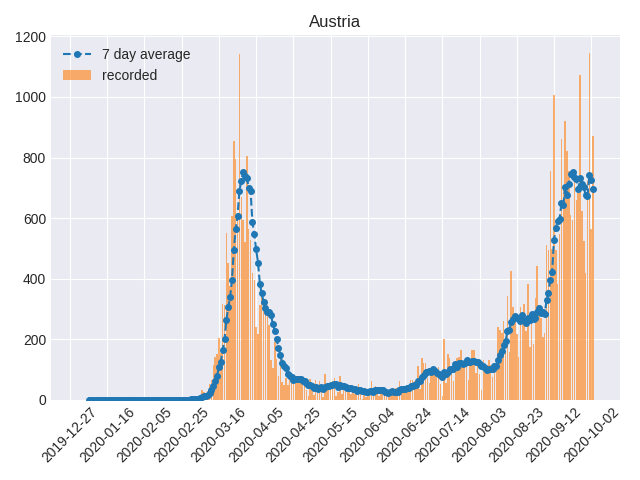

In [13]:
plot_Austria();
plot_country('AT', log=LOG_PLOT);

### Weekday bias

<IPython.core.display.Javascript object>


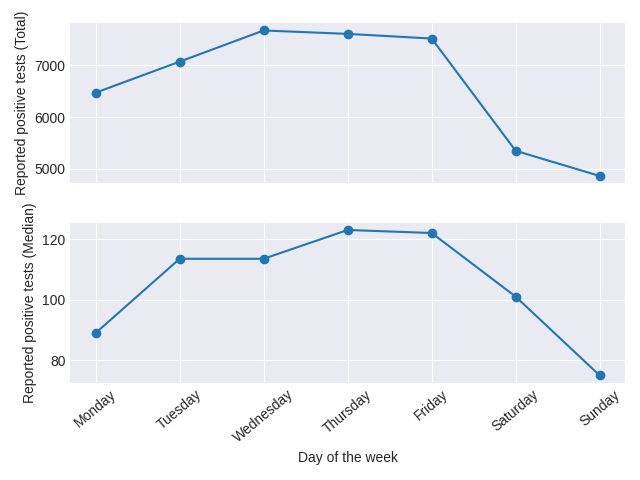

In [30]:
f, ax = plt.subplots(nrows=2, sharex=True)
df_at.groupby(['weekday']).sum()['tägliche Erkrankungen'].plot(ax=ax[0], marker='o')
ax[0].set_ylabel('Reported positive tests (Total)')
df_at.groupby(['weekday']).median()['tägliche Erkrankungen'].plot(ax=ax[1], marker='o')
ax[1].set_ylabel('Reported positive tests (Median)')
ax[1].set_xlabel('Day of the week')
ax[1].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticklabels(WEEKDAYS, rotation=40)
plt.tight_layout()

# India

<IPython.core.display.Javascript object>


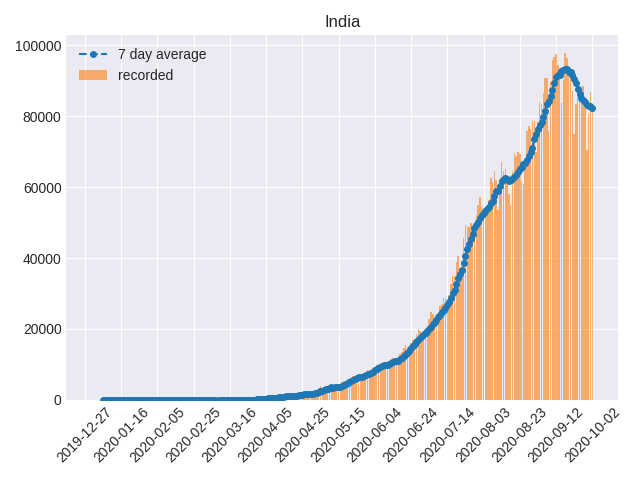

In [31]:
plot_country('IN', log=LOG_PLOT);

# USA

<IPython.core.display.Javascript object>


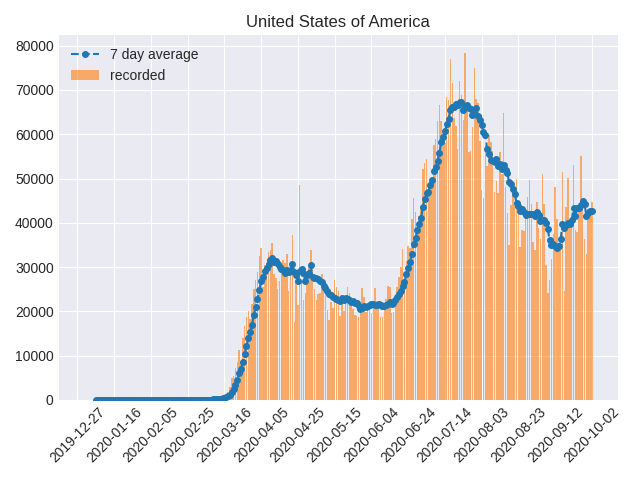

In [32]:
plot_country('US', log=LOG_PLOT);


# Germany

<IPython.core.display.Javascript object>


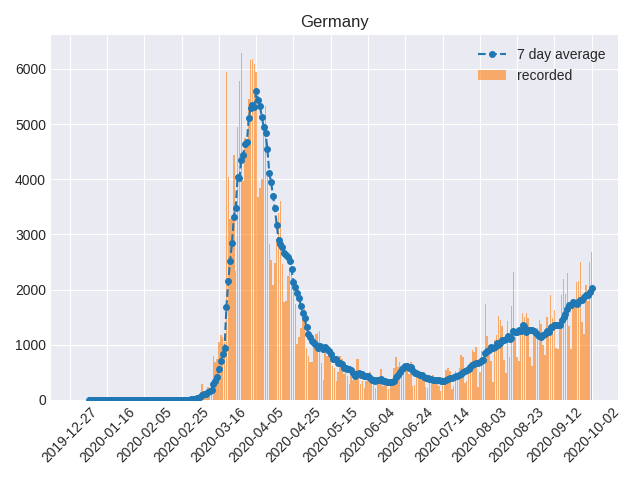

In [33]:
plot_country('DE', log=LOG_PLOT);

## UK

<IPython.core.display.Javascript object>


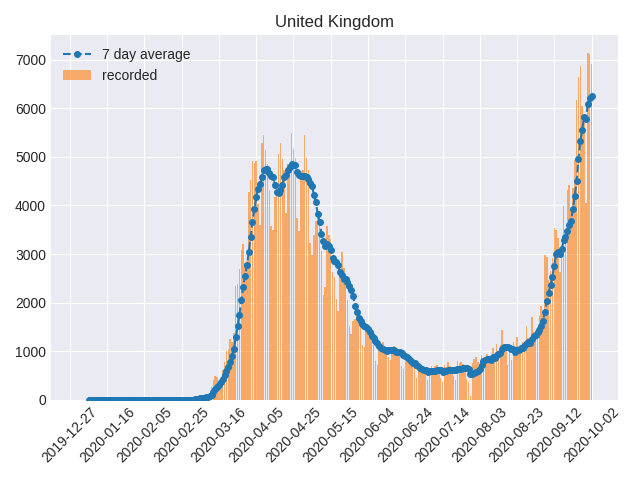

In [34]:
plot_country('UK', log=LOG_PLOT);

# China

<IPython.core.display.Javascript object>


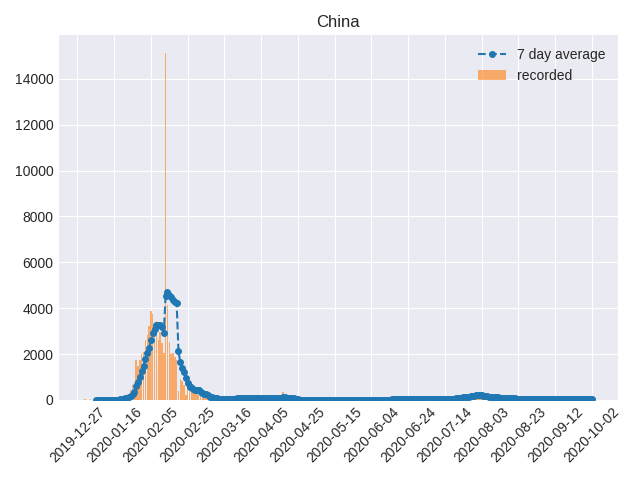

In [35]:
plot_country('CN', log=LOG_PLOT);


# Commit and Push

In [43]:
%cd Documents/code/covid19/
now = datetime.now()
commit_message = "Last run on " + now.strftime('%Y-%m-%d %H:%M')
commit_message
! echo $commit_message > commit_message.txt
! git add .
! git commit -F commit_message.txt
! git push


[Errno 2] No such file or directory: 'Documents/code/covid19/'
/home/gythaogg/Documents/code/covid19/notebooks
[feature/angular cb95e47] Last run on 2020-10-02 16:13
 3 files changed, 11889 insertions(+), 11286 deletions(-)
 rewrite notebooks/.ipynb_checkpoints/explore_ecdc_data-checkpoint.ipynb (63%)
 rewrite notebooks/Austria_ECDC Data Differences.ipynb (61%)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 16 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 517.08 KiB | 6.99 MiB/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:gythaogg/covid19.git
   f04b2e0..cb95e47  feature/angular -> feature/angular


In [37]:
! git push --set-upstream origin feature/angular


Enumerating objects: 87, done.
Counting objects: 100% (86/86), done.
Delta compression using up to 16 threads
Compressing objects: 100% (78/78), done.
Writing objects: 100% (81/81), 1.10 MiB | 13.40 MiB/s, done.
Total 81 (delta 22), reused 0 (delta 0)
remote: Resolving deltas: 100% (22/22), completed with 2 local objects.
remote: 
remote: Create a pull request for 'feature/angular' on GitHub by visiting:
remote:      https://github.com/gythaogg/covid19/pull/new/feature/angular
remote: 
To github.com:gythaogg/covid19.git
 * [new branch]      feature/angular -> feature/angular
Branch 'feature/angular' set up to track remote branch 'feature/angular' from 'origin'.
